In [40]:
import re
import glob
import numpy as np
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import tensorflow as tf
from keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, GlobalAveragePooling2D

In [26]:
files = glob.glob('/home/kiho/다운로드/두잉랩_과제/*')
_class = [x.split('/')[-1].replace('.jpg','') for x in files]

In [27]:
X = []
for file_name in tqdm(files):
    img = image.load_img(file_name, target_size = (100, 100))
    v = image.img_to_array(img)
    v = np.expand_dims(v, axis=0)
    if len(X) > 0:
        X = np.concatenate((X, v))
    else:
        X = v

100%|██████████| 1757/1757 [00:21<00:00, 43.56it/s]


In [28]:
p = re.compile("[^0-9]")
Y = ["".join(p.findall(x)) for x in _class]

In [29]:
X = tf.keras.applications.mobilenet.preprocess_input(X)

In [30]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(Y)
Y = to_categorical(y)

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2020)

In [32]:
mobileNetModel = MobileNet(weights = 'imagenet', include_top = False)

model = Sequential()
model.add(mobileNetModel)
model.add(GlobalAveragePooling2D())
model.add(Dense(5, activation = 'softmax', kernel_initializer = 'he_normal'))
model.compile(optimizer = 'adam', 
                loss = 'categorical_crossentropy', 
                metrics = ['acc']
             )

/home/kiho/anaconda3/lib/python3.7/site-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [33]:
history = model.fit(X_train, Y_train, 
                    batch_size = 64, 
                    epochs = 10, 
                    verbose = 1, 
                    validation_split = 0.2)

Train on 1124 samples, validate on 281 samples
Epoch 1/10
1124/1124 [==============================] - 9s 8ms/sample - loss: 1.2834 - acc: 0.6352 - val_loss: 4.4041 - val_acc: 0.4769
Epoch 2/10
1124/1124 [==============================] - 8s 7ms/sample - loss: 0.3215 - acc: 0.9057 - val_loss: 4.0517 - val_acc: 0.6335
Epoch 3/10
1124/1124 [==============================] - 7s 6ms/sample - loss: 0.2035 - acc: 0.9404 - val_loss: 3.3846 - val_acc: 0.6655
Epoch 4/10
1124/1124 [==============================] - 7s 6ms/sample - loss: 0.0532 - acc: 0.9831 - val_loss: 2.5301 - val_acc: 0.7011
Epoch 5/10
1124/1124 [==============================] - 7s 6ms/sample - loss: 0.0382 - acc: 0.9884 - val_loss: 2.2394 - val_acc: 0.7153
Epoch 6/10
1124/1124 [==============================] - 7s 6ms/sample - loss: 0.0255 - acc: 0.9920 - val_loss: 1.8355 - val_acc: 0.7616
Epoch 7/10
1124/1124 [==============================] - 7s 6ms/sample - loss: 0.0145 - acc: 0.9947 - val_loss: 1.2819 - val_acc: 0.7651
E

352/352 [==============================] - 1s 2ms/sample - loss: 1.8077 - acc: 0.8068
Loss: 1.808 | Accuracy: 0.807


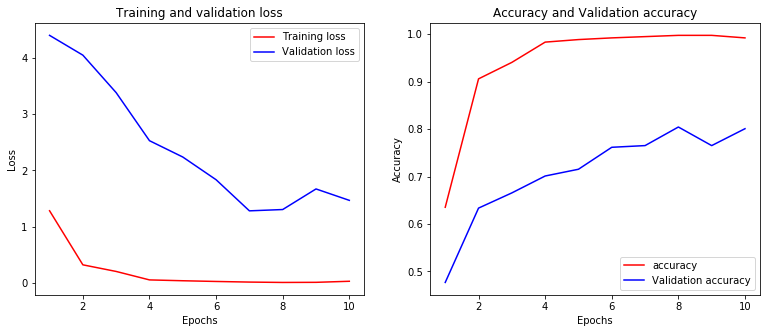

In [43]:
acc = model.evaluate(X_test, Y_test)
print('Loss: {:0.3f} | Accuracy: {:0.3f}'.format(acc[0],acc[1]))

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'r', label='accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Accuracy and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
plt.close()

In [44]:
def pred(img_path):
    img = image.load_img(img_path, target_size = (100, 100))
    v = image.img_to_array(img)
    v = np.expand_dims(v, axis=0)
    X = tf.keras.applications.mobilenet.preprocess_input(v)
    pred = model.predict(X)
    prob = np.max(pred)
    r = np.argmax(pred)
    mylist = ['감자탕','김밥','김치','족발','죽']
    dct = {k:v for k, v in enumerate(mylist)}
    print ('pred:',dct[r])
    print ('prob: {}%'.format(prob * 100))

In [46]:
pred('/home/kiho/다운로드/테스트_이미지/감자탕.jpg')

pred: 감자탕
prob: 99.9947190284729%
